# Project 1: MTH 281

The following project was completed by Summer Mills, Uzair Tahamid Siam, and Navya Uberoi.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams.update({'font.size': 12})

## Question 1

### Part (a)

In [2]:
def compute_Ugrid(grid):
    return np.sin(2 * np.pi * grid)

def compute_dudx(Ugrid, deltax = 0.1):
    return (np.roll(Ugrid, -1) - np.roll(Ugrid, 1)) / (2 * deltax)

In [3]:
delta_x = 0.1

grid1 = np.linspace(0.0, 0.9, 10)
grid2 = np.linspace(0.05, 0.95, 10)
grid3 = np.linspace(0.0, 1.0, 11)

Ugrid1 = compute_Ugrid(grid1)
Ugrid2 = compute_Ugrid(grid2)
Ugrid3 = compute_Ugrid(grid3)

dudx1 = compute_dudx(Ugrid1)
dudx2 = compute_dudx(Ugrid2)
dudx3 = compute_dudx(Ugrid3)

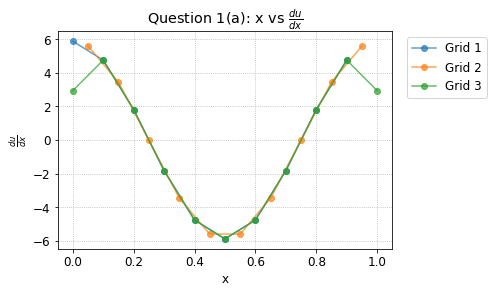

In [21]:
fig, ax = plt.subplots()

ax.plot(grid1, dudx1, '-o', label = 'Grid 1', alpha = 0.7)
ax.plot(grid2, dudx2, '-o', label = 'Grid 2', alpha = 0.7)
ax.plot(grid3, dudx3, '-o', label = 'Grid 3', alpha = 0.7)

ax.set(xlabel = 'x',
       ylabel = r'$\frac{du}{dx}$',
       title = r'Question 1(a): x vs $\frac{du}{dx}$')

lgd = ax.legend(bbox_to_anchor=(1., 0, 0.3, 1))
ax.grid(ls = ':')
fig.savefig('question1a.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

### Part (b)

In [5]:
Lx1 = 2.
Lx2 = 4.
Lx3 = 6.
Lx4 = 10.

delta_x = 0.1

def u(x):
    return np.exp(-x**2)

x_Lx1 = np.arange(delta_x/2 - Lx1/2, Lx1/2, delta_x)
x_Lx2 = np.arange(delta_x/2 - Lx2/2, Lx2/2, delta_x)
x_Lx3 = np.arange(delta_x/2 - Lx3/2, Lx3/2, delta_x)
x_Lx4 = np.arange(delta_x/2 - Lx4/2, Lx4/2, delta_x)

u_Lx1 = u(x_Lx1)
u_Lx2 = u(x_Lx2)
u_Lx3 = u(x_Lx3)
u_Lx4 = u(x_Lx4)

dudx_Lx1 = compute_dudx(u_Lx1)
dudx_Lx2 = compute_dudx(u_Lx2)
dudx_Lx3 = compute_dudx(u_Lx3)
dudx_Lx4 = compute_dudx(u_Lx4)

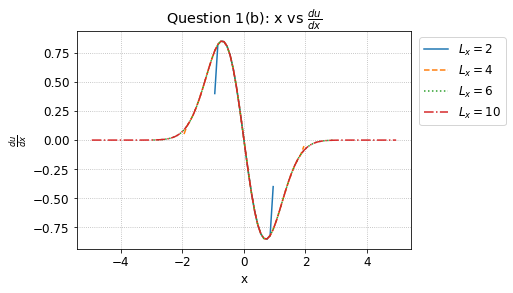

In [6]:
fig, ax = plt.subplots()

ax.plot(x_Lx1, dudx_Lx1, ls = '-', label = r'$L_x=2$')#, alpha = 0.7)
ax.plot(x_Lx2, dudx_Lx2, ls = '--', label = r'$L_x=4$')#, alpha = 0.7)
ax.plot(x_Lx3, dudx_Lx3, ls = ':', label = r'$L_x=6$')#, alpha = 0.7)
ax.plot(x_Lx4, dudx_Lx4, ls = '-.', label = r'$L_x=10$')#, alpha = 0.7)

ax.set(xlabel = 'x',
       ylabel = r'$\frac{du}{dx}$',
       title = r'Question 1(b): x vs $\frac{du}{dx}$')

ax.legend(bbox_to_anchor=(1., 0, 0.3, 1))
ax.grid(ls = ':')
# fig.savefig('question1b.png')

## Question 2

In [16]:
def f(x, Nmodes):
    return np.sin(Nmodes * x)

def f_prime(x, Nmodes):
    return np.cos(Nmodes * x) * Nmodes

def question2(NModes):
    Lx = 2*np.pi
    Nxs = np.power(2, np.arange(2, 9))

    # Create some arrays to store the error values
    err_2 = np.zeros(Nxs.shape)
    err_4 = np.zeros(Nxs.shape)

    # Create 
    gridspec_props = dict(wspace = 0.05, hspace = 0.5, left = 0.1, right = 0.8, bottom = 0.1, top = 0.9)
    fig, axes = plt.subplots(3, 1, figsize=(10,12), gridspec_kw = gridspec_props)
    title = fig.suptitle('NModes={}'.format(NModes), y = 0.95, x = 0.45)

    for Nx, ind in zip(Nxs, range(len(Nxs))):

        # Grid with chosen resolution
        x  = np.linspace(0, Lx, Nx)[:-1]
        Delta_x = x[1] - x[0]

        # Function to differentiation
        y  = f(x, NModes)

        # True derivative
        yp = f_prime(x, NModes)

        # Compute the numerical derivatives
        Ord2 = (                      np.roll(y, -1) -   np.roll(y, 1)                 ) / ( 2*Delta_x)
        Ord4 = ( - np.roll(y, -2) + 8*np.roll(y, -1) - 8*np.roll(y, 1) + np.roll(y, 2) ) / (12*Delta_x)

        # Store the error in the derivatives
        err_2[ind] = np.sqrt(np.mean( (Ord2 - yp)**2 ))
        err_4[ind] = np.sqrt(np.mean( (Ord4 - yp)**2 ))

        # Plot the derivative on the figure
        axes[1].plot(np.append(x, Lx), np.append(Ord2, Ord2[0]), '.-', label='Nx={0:d}'.format(Nx))
        axes[2].plot(np.append(x, Lx), np.append(Ord4, Ord4[0]), '.-', label='Nx={0:d}'.format(Nx))

    ##
    ## Add some formatting to the figures, and plot the error values.
    ##
    axes[1].set_title('Order 2 Derivative')
    axes[2].set_title('Order 4 Derivative')
    for ax in axes[1:]:
        ax.set_xlabel('x')
        ax.set_ylabel('dy/dx')
        ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
        ax.set_xticklabels(['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])

    axes[0].plot(Lx/Nxs, err_2, '-o', label='2nd order')
    axes[0].plot(Lx/Nxs, err_4, '-o', label='4th order')
    axes[0].plot(Lx/Nxs, (Lx/Nxs)**2, '--k', label='$dx^2$')
    axes[0].plot(Lx/Nxs, (Lx/Nxs)**4, '-.k', label='$dx^4$')


    lgd1 = axes[0].legend(bbox_to_anchor=(1., 0, 0.25, 1))
    x1 = axes[0].set_xlabel('$\Delta x$')
    y1 = axes[0].set_ylabel('Finite Difference Error')
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    axes[0].set_title('Demonstration of Convergence Order')

    for ax in axes:
        ax.grid(True)

    lgd2 = axes[1].legend(bbox_to_anchor=(1., -1, 0.25, 2))
    fig.savefig('question2nmode{}.png'.format(NModes), bbox_extra_artists=(lgd1, lgd2, title, y1, x1), bbox_inches='tight')
    return fig, axes

#### Plotting for `NModes`=1

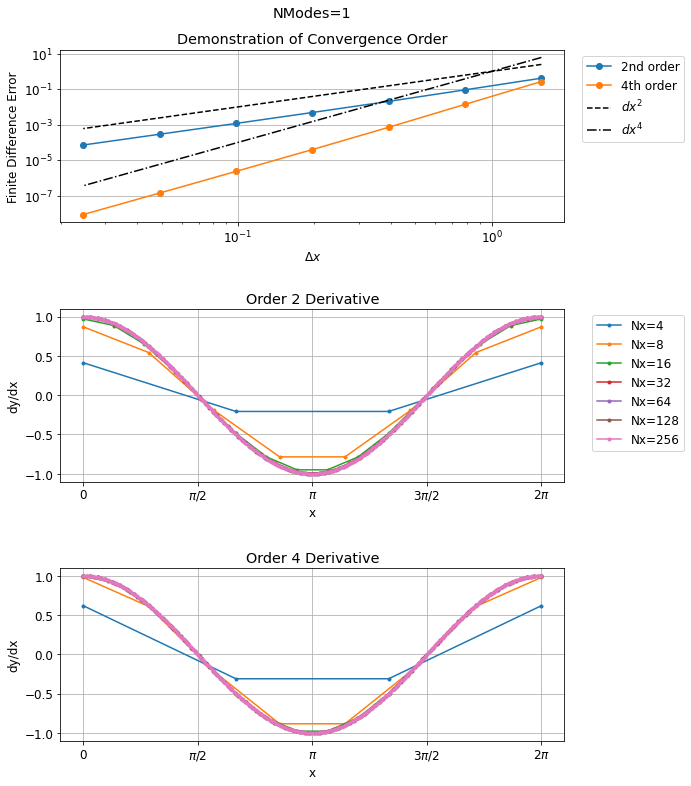

In [8]:
fig, axes = question2(1)

#### Plotting for `NModes`=10

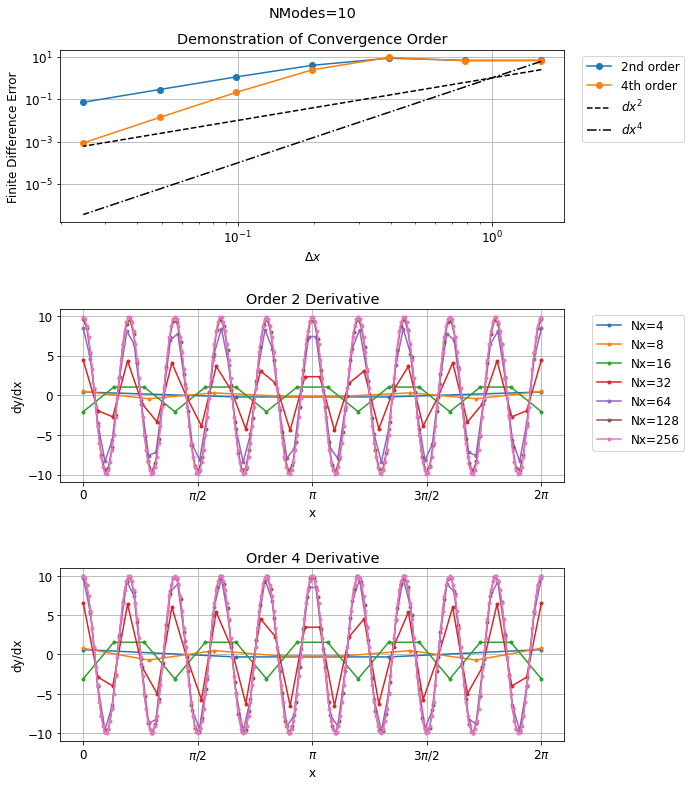

In [9]:
fig, axes = question2(10)

## Question 3

In [2]:
def solution(u_initial, start_time, final_time, delta_t, expression_number):
    # Nt is the number of output times that we'll need to store the solution
    Nt = int( np.ceil(final_time / delta_t) ) + 2
    
    # First order storage
    u_vec = np.zeros(Nt)
    
    # Time storage
    t_vec = np.zeros(Nt)
    
    # Store initial values
    u_vec[0] = u_initial
    t_vec[0] = start_time
    
    # Interating values
    curr_time = start_time
    u = u_initial
    
    output_number = 0
    while curr_time < final_time:

        # Compute the RHS of the ODE (2*t)
        if expression_number == 1:                
            dudt = np.sin(2 * np.pi * curr_time)
        elif expression_number == 2:
            dudt = u / 2
        elif expression_number == 3:
            dudt = 2.
        else: return False

        # Update first-order record
        u = u + delta_t * dudt

        # Increase 'time' by Delta t
        curr_time = curr_time + delta_t

        # Store the new values in our array
        output_number = output_number + 1
        u_vec[output_number] = u
        t_vec[output_number] = curr_time
        
    # This is just a precaution in case some funky things happen
    t_vec = t_vec[:output_number]
    u_vec = u_vec[:output_number]
    
    if expression_number == 1:                
        true_solution = -np.cos(2 * np.pi * t_vec) / (2 * np.pi) + 1 / (2 * np.pi)
    elif expression_number == 2:
        true_solution = 0.01 * np.exp(0.5 * t_vec)
    elif expression_number == 3:
        true_solution = 2 * t_vec
    
    return t_vec, u_vec, true_solution

## Part (a)
$\frac{du}{dt}=\sin(2\pi t)$

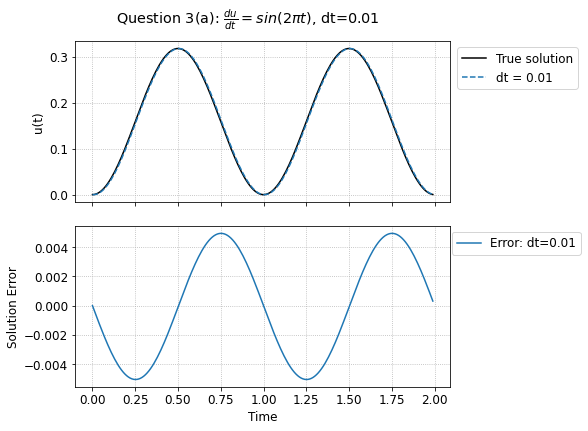

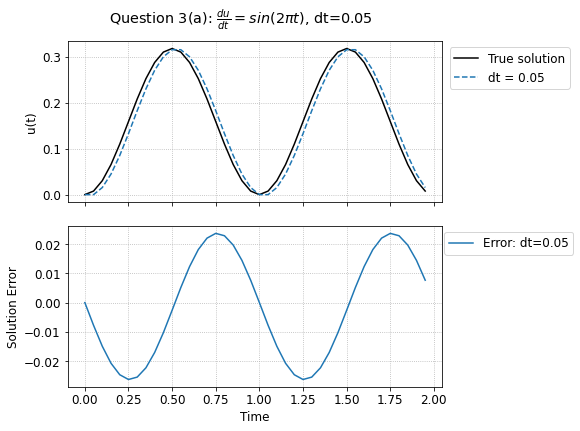

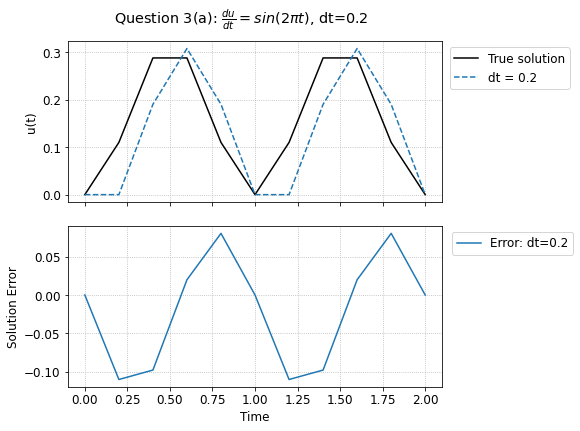

In [11]:
gridspec_props = dict(wspace = 0.05, hspace = 0.15, left = 0.1, right = 0.75, bottom = 0.1, top = 0.9)

delta_t = [0.01, 0.05, 0.2]

for dt in delta_t:
    fig, axes = plt.subplots(2, 1, sharex=True, figsize = (8, 6), gridspec_kw = gridspec_props)
    titletext = r'$\frac{du}{dt}=sin(2\pi t)$'
    title = fig.suptitle(r'Question 3(a): {}, dt={}'.format(titletext, dt), x=0.4)
    t_vec1, u_vec1, true_solution1 = solution(u_initial = 0., start_time = 0., final_time = 2., delta_t = dt, expression_number = 1)
    axes[0].plot(t_vec1, true_solution1, color = 'k', label = 'True solution')
    axes[0].plot(t_vec1, u_vec1, ls = '--', label = 'dt = {}'.format(dt))

    axes[1].plot(t_vec1, u_vec1 - true_solution1, label = 'Error: dt={}'.format(dt))

    lgd1 = axes[0].legend(bbox_to_anchor=(1.107, 0, 0.25, 1))
    lgd2 = axes[1].legend(bbox_to_anchor=(1.116, 0, 0.25, 1))

    x = axes[1].set_xlabel('Time')

    y1 = axes[0].set_ylabel('u(t)')
    y2 = axes[1].set_ylabel('Solution Error')
    axes[0].grid(ls = ':')
    axes[1].grid(ls = ':')

    fig.savefig('question3eq1subpartdt{}.png'.format(dt),  bbox_extra_artists=(lgd1, lgd2, title, y1, y2, x), bbox_inches='tight')

## Part (b)
$\frac{du}{dt}=\frac{u}{2}$

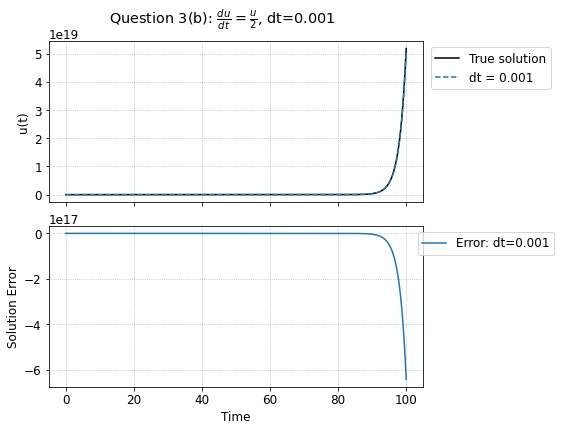

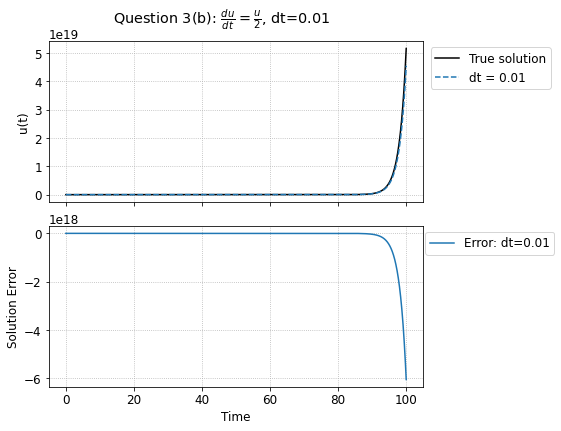

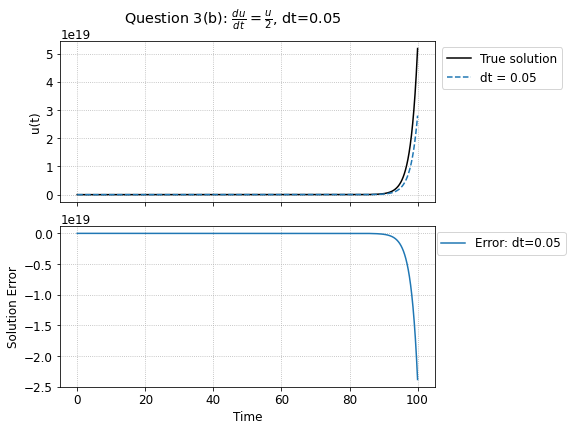

In [20]:
gridspec_props = dict(wspace = 0.05, hspace = 0.15, left = 0.1, right = 0.75, bottom = 0.1, top = 0.9)

delta_t = [0.001, 0.01, 0.05]

for dt in delta_t:
    fig, axes = plt.subplots(2, 1, sharex=True, figsize = (8, 6), gridspec_kw = gridspec_props)
    titletext = r'$\frac{du}{dt}=\frac{u}{2}$'
    title = fig.suptitle(r'Question 3(b): {}, dt={}'.format(titletext, dt), x=0.4)
    t_vec2, u_vec2, true_solution2 = solution(u_initial = 0.01, start_time = 0., final_time = 100., delta_t = dt, expression_number = 2)
    axes[0].plot(t_vec2, true_solution2, color = 'k', label = 'True solution')
    axes[0].plot(t_vec2, u_vec2, ls = '--', label = 'dt = {}'.format(dt))

    axes[1].plot(t_vec2, u_vec2 - true_solution2, label = 'Error: dt={}'.format(dt))

    lgd1 = axes[0].legend(bbox_to_anchor=(1.107, 0, 0.25, 1))
    lgd2 = axes[1].legend(bbox_to_anchor=(1.116, 0, 0.25, 1))

    x = axes[1].set_xlabel('Time')

    y1 = axes[0].set_ylabel('u(t)')
    y2 = axes[1].set_ylabel('Solution Error')
    axes[0].grid(ls = ':')
    axes[1].grid(ls = ':')
    axes[0].set_yscale('log') ## Comment this out when you want the linear plots, and change filename accordingly

    fig.savefig('question3eq2subpartdt{}_logscale.png'.format(dt),  bbox_extra_artists=(lgd1, lgd2, title, y1, y2, x), bbox_inches='tight')

## Part (c)
$\frac{du}{dt}=2$

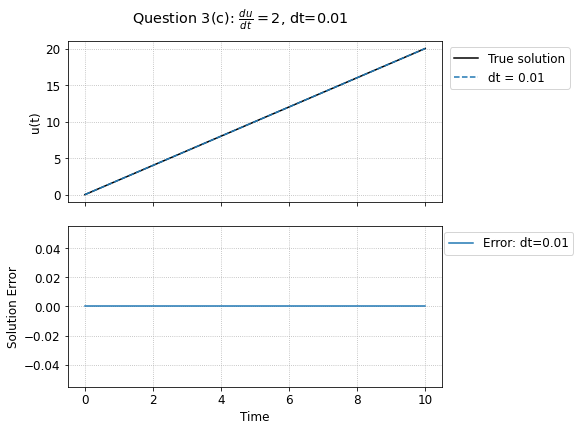

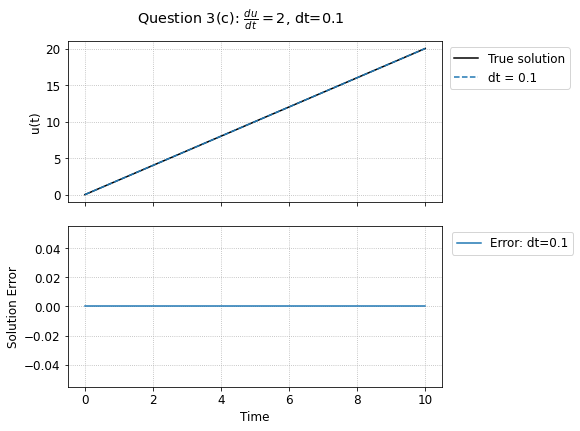

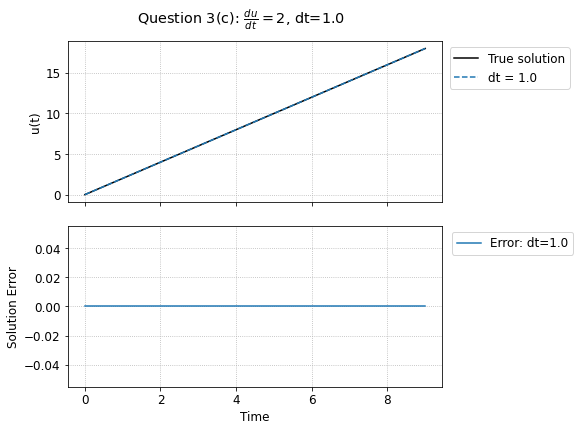

In [13]:
gridspec_props = dict(wspace = 0.05, hspace = 0.15, left = 0.1, right = 0.75, bottom = 0.1, top = 0.9)

delta_t = [ 0.01, 0.1, 1.0]

for dt in delta_t:
    fig, axes = plt.subplots(2, 1, sharex=True, figsize = (8, 6), gridspec_kw = gridspec_props)
    titletext = r'$\frac{du}{dt}=2$'
    fig.suptitle(r'Question 3(c): {}, dt={}'.format(titletext, dt), x=0.4)
    t_vec3, u_vec3, true_solution3 = solution(u_initial = 0., start_time = 0., final_time = 10., delta_t = dt, expression_number = 3)
    axes[0].plot(t_vec3, true_solution3, color = 'k', label = 'True solution')
    axes[0].plot(t_vec3, u_vec3, ls = '--', label = 'dt = {}'.format(dt))

    axes[1].plot(t_vec3, u_vec3 - true_solution3, label = 'Error: dt={}'.format(dt))

    axes[0].legend(bbox_to_anchor=(1.107, 0, 0.25, 1))
    axes[1].legend(bbox_to_anchor=(1.107, 0, 0.25, 1))

    lgd1 = axes[0].legend(bbox_to_anchor=(1.107, 0, 0.25, 1))
    lgd2 = axes[1].legend(bbox_to_anchor=(1.116, 0, 0.25, 1))

    x = axes[1].set_xlabel('Time')

    y1 = axes[0].set_ylabel('u(t)')
    y2 = axes[1].set_ylabel('Solution Error')
    axes[0].grid(ls = ':')
    axes[1].grid(ls = ':')

    fig.savefig('question3eq3subpartdt{}.png'.format(dt),  bbox_extra_artists=(lgd1, lgd2, title, y1, y2, x), bbox_inches='tight')

## Question 4

In [14]:
def Q4(CFL):
    final_time = 5.

    Nx = 200

    delta_x = 10 / Nx
    delta_t = CFL * delta_x

    print("Delta t = {0:g}, Delta x = {1:g}".format(delta_t, delta_x))

    x = np.arange(delta_x / 2. - 5, 5, delta_x)

    Nt = Nt = int( np.ceil(final_time / delta_t) ) + 2
    t = np.zeros(Nt)
    t[0] = 0.

    solution = np.zeros((Nt,Nx))
    solution[0,:] = np.exp( - ((x-2.5)/(0.5))**2 )

    curr_time = t[0]
    u = solution[0,:]

    output_number = 0
    while curr_time < final_time:

        # Compute the RHS of the ODE (2*t)
        dudt = ( np.roll(u, -1) - np.roll(u, 1) ) / ( 2 * delta_x )

        # Update first-order record
        u = u + delta_t * dudt

        # Increase 'time' by Delta t
        curr_time = curr_time + delta_t

        # Store the new values in our array
        output_number = output_number + 1
        solution[output_number,:] = u
        t[output_number] = curr_time

    # Helps to avoid odd errors from funky step sizes
    t = t[:output_number]
    solution = solution[:output_number,:]

    gridspec_props = dict(left = 0.1, right = 0.9, bottom = 0.1, top = 0.85)

    fig, axes = plt.subplots(1, 1, sharex=True, figsize = (7, 5), gridspec_kw = gridspec_props)

    plt.pcolormesh(x, t, solution, cmap = 'gray')

    plt.colorbar()
    plt.grid(color='r', linestyle='--')

    plt.xlabel('x')
    plt.ylabel('t')

    plt.title('Advection Solution \n $\Delta t$ = {0:g}, $\Delta x$ = {1:g}, CFL = {2:g}'.format(delta_t, delta_x, CFL))

    plt.savefig('Question_CFL{}_sample.png'.format(CFL))

Delta t = 0.0005, Delta x = 0.05


c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


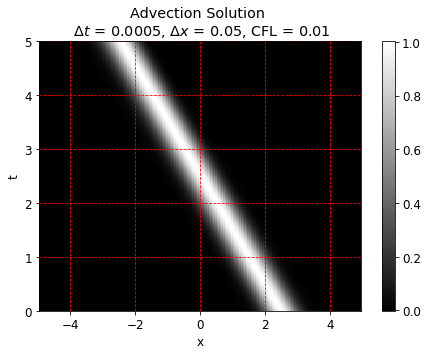

In [15]:
Q4(0.01)

Delta t = 0.005, Delta x = 0.05


c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


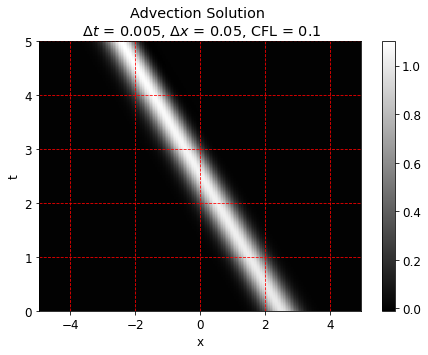

In [16]:
Q4(0.1)

Delta t = 0.025, Delta x = 0.05


c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


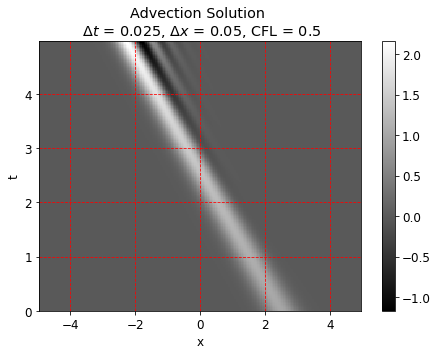

In [17]:
Q4(0.5)

Delta t = 0.0175, Delta x = 0.05


c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


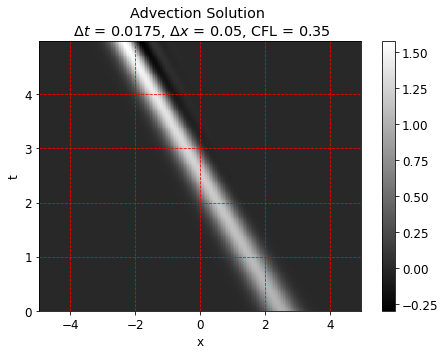

In [18]:
Q4(0.35)